<a href="https://colab.research.google.com/github/dlguswn3659/class-MachineLearning/blob/master/assignment05-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Assignment05** #

Name : 이현주

Student # : 20184060

# **1. Plot the training data [2pt]**

- plot the training data points (x,y) with their labels / in colors (blue for label 0 and red for label 1)

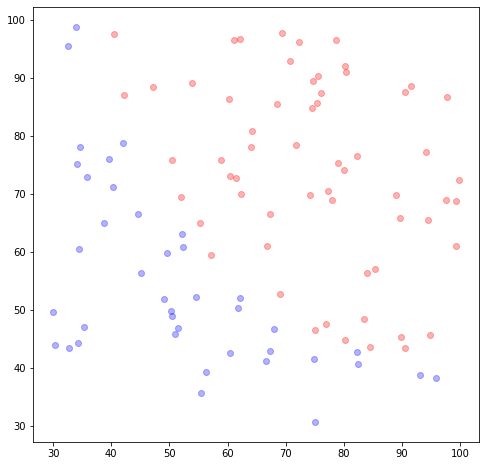

In [59]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.animation as animation
from scipy import stats 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_regression 
import csv
import math
# from google.colab import files

# uploaded = files.upload()

data    = np.genfromtxt("data.txt", delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]

x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()

# **2. Plot the estimated parameters [3pt]**

- plot the estimated parameters (θ0,θ1,θ2) at every iteration of gradient descent until convergence
- the colors for the parameters (θ0,θ1,θ2) should be red, green, blue, respectively

In [60]:
X = x #전체 x
y = np.array(y,dtype=float)
label = np.array(label,dtype=float)
print(len(y))
# print(X)
# print(y)
# print(label)

100


In [0]:
def gradient_descent(X,y,label,theta,learning_rate=0.0000001,iterations=100000):
    
    m = len(y)

    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,3))
    for it in range(iterations):
        pred = 0
        pred0 = 0
        pred1 = 0
        pred2 = 0

        for i in range(0, m):
          # print(i)
          #cost 함수
          pred = pred + ((-1)*label[i]*math.log(1/(1 + math.exp((-1)*(theta[0][it] + theta[1][it]*X[i] + theta[2][it]*y[i]))))-((1-label[i])*math.log(1 - (-1)*(1/(1 + math.exp((-1)*(theta[0][it] + theta[1][it]*X[i] + theta[2][it]*y[i])))))))
          
          #  σ(z)   =    (1/(1 + math.exp((-1)*(theta[0][it] + theta[1][it]*X[i] + theta[2][it]*y[i]))))

          #theta함수
          pred0 = pred0 + ((1/(1 + math.exp((-1)*(theta[0][it] + theta[1][it]*X[i] + theta[2][it]*y[i])))) - label[i])
          pred1 = pred1 + ((1/(1 + math.exp((-1)*(theta[0][it] + theta[1][it]*X[i] + theta[2][it]*y[i])))) - label[i])*X[i]
          pred2 = pred2 + ((1/(1 + math.exp((-1)*(theta[0][it] + theta[1][it]*X[i] + theta[2][it]*y[i])))) - label[i])*y[i]
        
        theta[0][it + 1] = theta[0][it] - (1/m)*learning_rate*pred0
        theta[1][it + 1] = theta[1][it] - (1/m)*learning_rate*pred1
        theta[2][it + 1] = theta[2][it] - (1/m)*learning_rate*pred2

        theta_history[it][0] = theta[0][it]
        theta_history[it][1] = theta[1][it]
        theta_history[it][2] = theta[2][it]
        cost_history[it]  = (1/m) * pred
        
    return theta, cost_history, theta_history

In [0]:
lr =0.0000001
n_iter = 1000000

theta = np.ones((3, n_iter + 1))
theta[0][0] = -0.8
theta[1][0] = 0.2
theta[2][0] = -0.2

X_b = np.c_[np.ones((len(X),0)),X]
X_b = np.array(X_b,dtype=float)
# print(X_b.shape)
# print(X_b.dtype)
# print(y.dtype)
theta,cost_history,theta_history = gradient_descent(X_b,y,label,theta,lr,n_iter)

1000000


IndexError: ignored

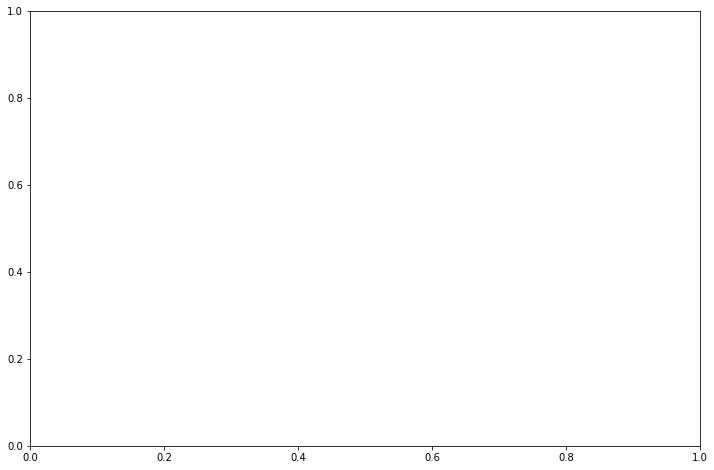

In [63]:
fig,ax = plt.subplots(figsize=(12,8))

theta0_history = []
theta1_history = []
theta2_history = []

for it in range(n_iter):
  theta0_history.append(theta_history[it][0])
  theta1_history.append(theta_history[it][1])
  theta2_history.append(theta_history[it][2])

# print(theta0_history)
# print(n_iter)
# print(theta_history[1000000][0])
# print(theta_history[1000000][1])
# print(theta_history[1000000][2])

# theta0_best = theta_history[1000000][0]
# theta1_best = theta_history[1000000][1]
# theta2_best = theta_history[1000000][2]



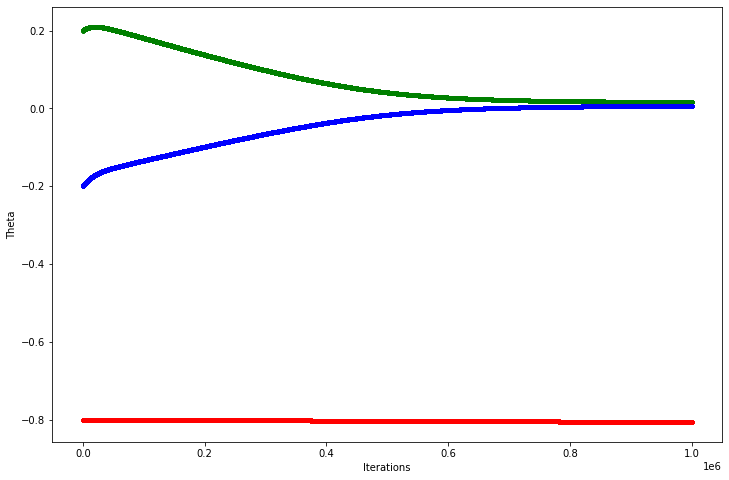

In [65]:
fig,ax = plt.subplots(figsize=(12,8))

theta0_history = []
theta1_history = []
theta2_history = []

for it in range(n_iter):
  theta0_history.append(theta_history[it][0])
  theta1_history.append(theta_history[it][1])
  theta2_history.append(theta_history[it][2])

ax.set_ylabel('Theta')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),theta0_history,'b.', color = 'red')
_=ax.plot(range(n_iter),theta1_history,'b.', color = 'green')
_=ax.plot(range(n_iter),theta2_history,'b.', color = 'blue')

In [0]:
# print(theta0_history[999999])
# print(theta1_history[999999])
# print(theta2_history[999999])

# theta0_best = theta0_history[999999]
# theta1_best = theta1_history[999999]
# theta2_best = theta2_history[999999]

In [0]:
# X_b = np.c_[np.ones((100,1)),X]
# theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
# print(theta_best)

# **3. Plot the training error [3pt]**

* plot the training error J(θ0,θ1,θ2) at every iteration of gradient descent until convergence (in blue color)

In [0]:
lr =0.00001
n_iter = 500

theta = np.zeros((3, n_iter + 1))

X_b = np.c_[np.ones((len(X),0)),X]
X_b = np.array(X_b,dtype=float)
# print(X_b.shape)
# print(X_b.dtype)
# print(y.dtype)
theta,cost_history,theta_history = gradient_descent(X_b,y,label,theta,lr,n_iter)

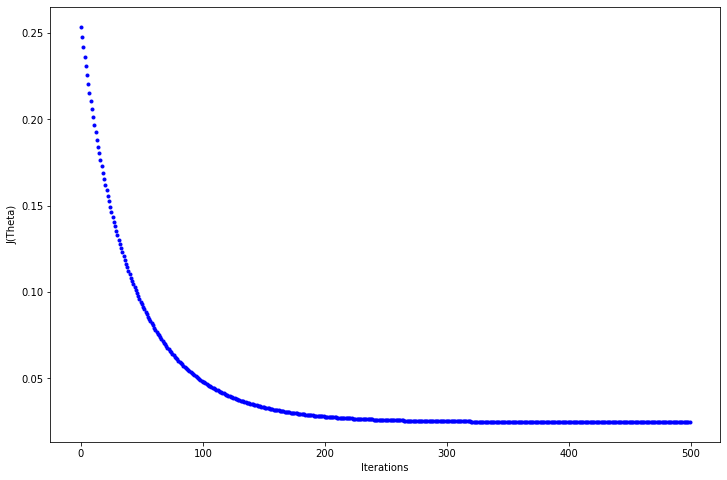

In [70]:
fig,ax = plt.subplots(figsize=(12,8))

# n_iter = 50
# cost_history = new_cost(X_b,y,theta,n_iter)

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

# **4. Plot the obtained classifier [4pt]**

- plot the classifier σ(z) where z=θ0+θ1x+θ2y with x=[30:0.5:100] and y=[30:0.5:100]
- [a:t:b] denotes a range of values from a to b with a stepsize t
- use a colormap where blue is used for 0, red is used for 1, their weighted combination for a value between 0 and 1
- plot the training data points (x,y) with their labels / in colors (blue for label 0 and red for label 1) superimposed on the classifier

In [0]:
#classifier 정의하기
#  σ(z)   =    (1/(1 + math.exp((-1)*(theta[0][it] + theta[1][it]*X[i] + theta[2][it]*y[i]))))
#  σ(z)   =    (1/(1 + math.exp((-1)*(theta[0][500000] + theta[1][500000]*X + theta[2][500000]*y))))

In [0]:
# from itertools import product
# import numpy as np
# import matplotlib.pyplot as plt

# from sklearn import datasets
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.ensemble import VotingClassifier

# # Loading some example data
# iris = datasets.load_iris()
# X = iris.data[:, [1]]
# y = iris.target

# print(X)
# print(y)

# # Training classifiers
# clf1 = DecisionTreeClassifier(max_depth=4)
# clf2 = KNeighborsClassifier(n_neighbors=7)
# clf3 = SVC(kernel='rbf', probability=True)
# eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
#                                     ('svc', clf3)],
#                         voting='soft', weights=[2, 1, 2])

# clf1.fit(X, y)
# clf2.fit(X, y)
# clf3.fit(X, y)
# eclf.fit(X, y)

In [0]:
# # Plotting decision regions
# xx, yy = np.meshgrid(np.arange(0, 2, 0.01),
#                      np.arange(0, 2, 0.01))
# # xx, yy = np.meshgrid(np.arange(30, 100, 0.5),
# #                      np.arange(30, 100, 0.5))

# f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

# for idx, clf, tt in zip(product([0, 1], [0, 1]),
#                         [clf1, clf2, clf3, eclf],
#                         ['Decision Tree (depth=4)', 'KNN (k=7)',
#                          'Kernel SVM', 'Soft Voting']):

#     Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)

#     axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
#     axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
#                                   s=20, edgecolor='k')
#     axarr[idx[0], idx[1]].set_title(tt)

# plt.show()

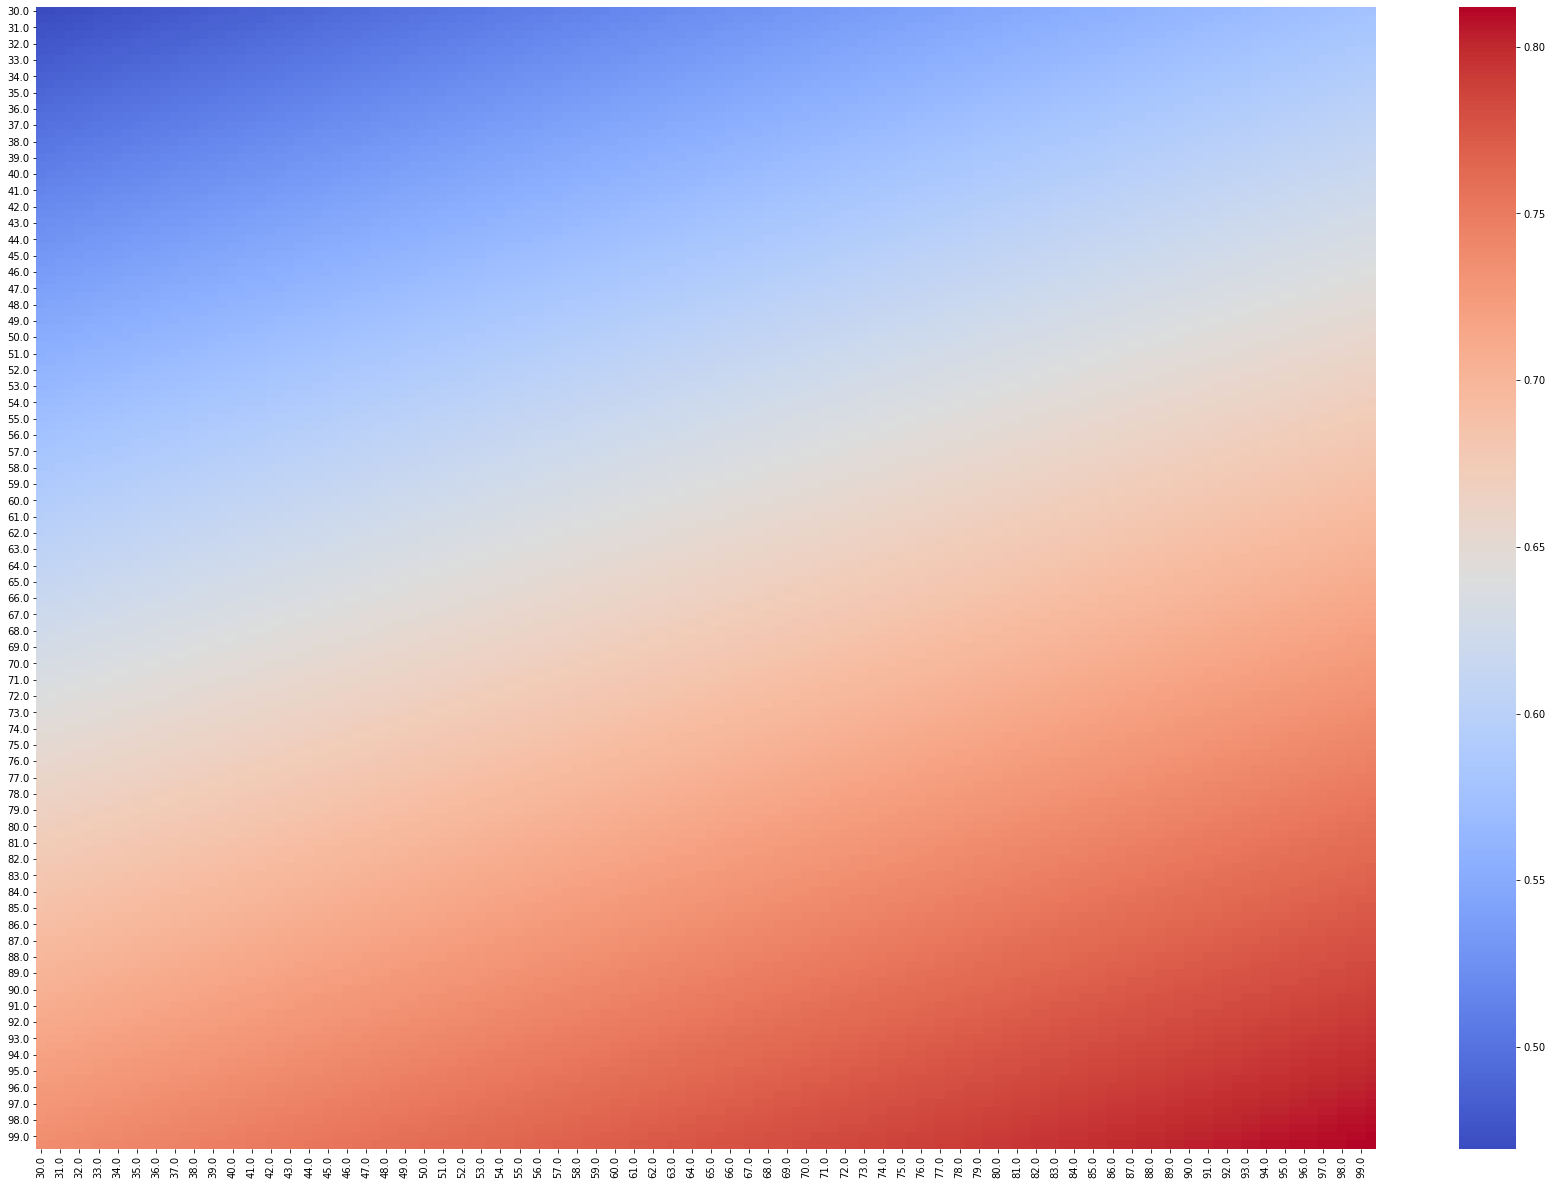

In [78]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = np.zeros((140, 140))
# print(array)

#i를 X, j를 y라 한 상황
for i in np.arange(30, 100, 0.5):
  for j in np.arange(30, 100, 0.5):
    # print((j - 30) * 2)
    array[int((i - 30) * 2)][int((j - 30) * 2)] = (1/(1 + math.exp((-1)*(theta0_best + theta1_best*i + theta2_best*j))))

# print(array)

# array = [[33,2,0,0,0,0,0,0,0,1,3], 
#         [3,31,0,0,0,0,0,0,0,0,0], 
#         [0,4,41,0,0,0,0,0,0,0,1], 
#         [0,1,0,30,0,6,0,0,0,0,1], 
#         [0,0,0,0,38,10,0,0,0,0,0], 
#         [0,0,0,3,1,39,0,0,0,0,4], 
#         [0,2,2,0,4,1,31,0,0,0,2],
#         [0,1,0,0,0,0,0,36,0,2,0], 
#         [0,0,0,0,0,0,1,5,37,5,1], 
#         [3,0,0,0,0,0,0,0,0,39,0], 
#         [0,0,0,0,0,0,0,0,0,0,38]]
df_cm = pd.DataFrame(array, index = [i for i in np.arange(30,100,0.5)],
                  columns = [i for i in np.arange(30,100,0.5)])
plt.figure(figsize = (30,21))

sn.heatmap(df_cm, cmap = "coolwarm")